In [1]:
plist vtbin


Parameters for /soft/ciao-4.13/contrib/param/vtbin.par

        infile =                  Input image
       outfile =                  Output map
       (binimg = )                Output image file
        (shape = box)             Shape of local max mask
       (radius = 2.5)             Radius of local max mask
     (sitefile = )                Input site file
      (verbose = 1)               Tool chatter level
      (clobber = no)              Remove outfile if it already exists?
         (mode = ql)              



In [2]:
ls *flux*

-rw-r--r-- 1 kjg kjg 15851520 Jan  6 12:39 abell665.flux.asm
-rw-r--r-- 1 kjg kjg    81966 Jan  6 12:39 abell665.flux.asm.png
-rw-r--r-- 1 kjg kjg  7937280 Jan  6 12:18 abell665_broad_flux.img
-rw-r--r-- 1 kjg kjg 15851520 Jan  6 12:40 sm.flux
-rw-r--r-- 1 kjg kjg   102145 Jan  6 12:41 sm.flux.png


In [3]:
/bin/rm -rf vtbin/
mkdir vtbin
vtbin infile=abell665.flux.asm outfile=vtbin/tess.map binimg=vtbin/tess.img clob+

vtbin
          infile = abell665.flux.asm
         outfile = vtbin/tess.map
          binimg = vtbin/tess.img
           shape = box
          radius = 2.5
        sitefile = 
         verbose = 1
         clobber = yes
            mode = ql

Finding local maxima
Assigning pixels to maxima


In [4]:
### map2reg tess.map tess.reg clob+
dmimggrad vtbin/tess.map vtbin/tess.grad sobel mag clob+

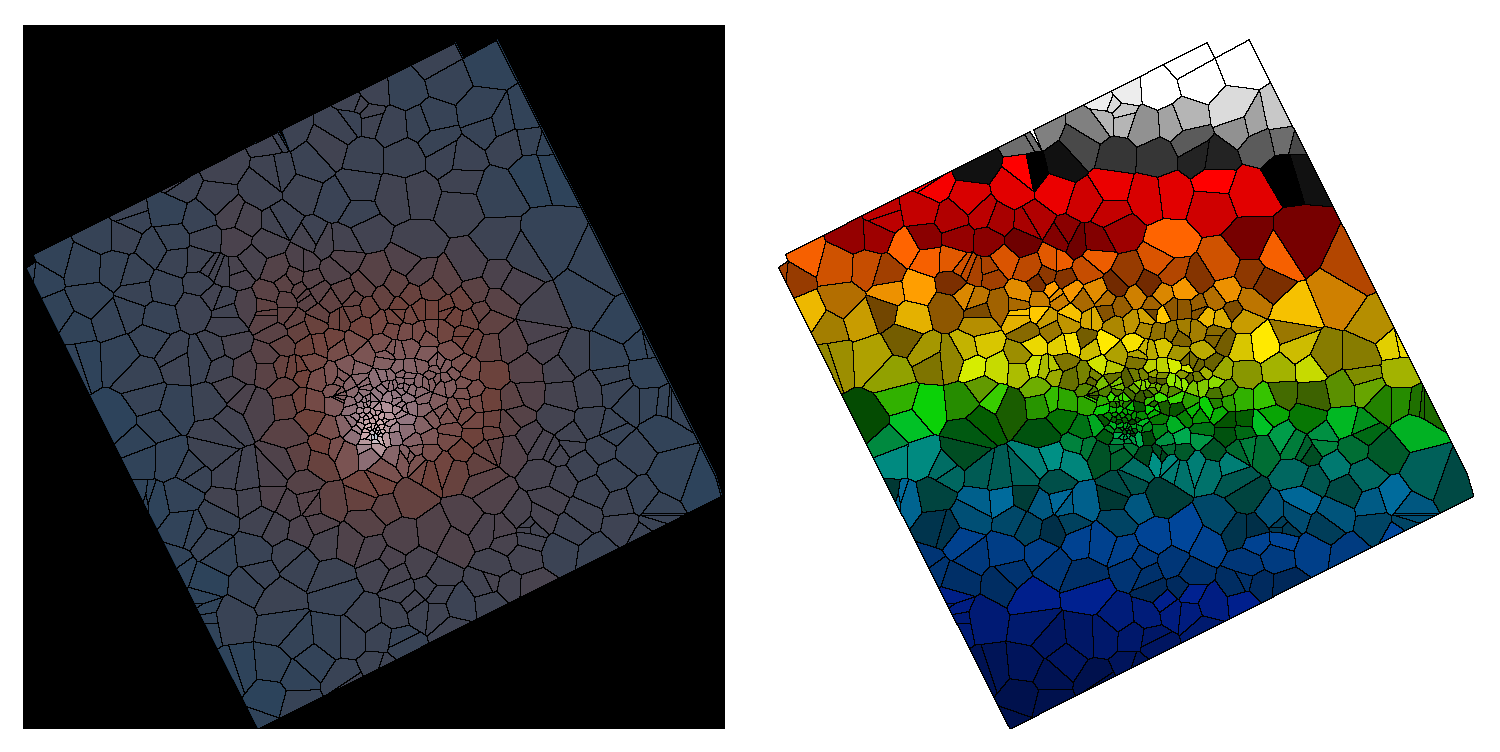

In [6]:
ds9 -geometry 1500x800 vtbin/tess.img -scale log -block to 2 -scale limits 0 2e-6 \
    -cmap load sunset-in-atlantis.sao \
    -mask color black -mask vtbin/tess.grad -nomask \
    vtbin/tess.map -scale linear -scale mode minmax -zoom to 0.5 -block to 1 \
    -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
    -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
    -mask color black -mask vtbin/tess.grad -nomask \
    -saveimage png tess.png -exit

display < tess.png

In [13]:
vtbin infile=abell665.flux.asm outfile=vtbin/tess5.map binimg=vtbin/tess5.img clob+ radius=10

vtbin
          infile = abell665.flux.asm
         outfile = vtbin/tess5.map
          binimg = vtbin/tess5.img
           shape = box
          radius = 10
        sitefile = 
         verbose = 1
         clobber = yes
            mode = ql

Finding local maxima
Assigning pixels to maxima


In [14]:
dmimggrad vtbin/tess5.map vtbin/tess5.grad sobel mag clob+

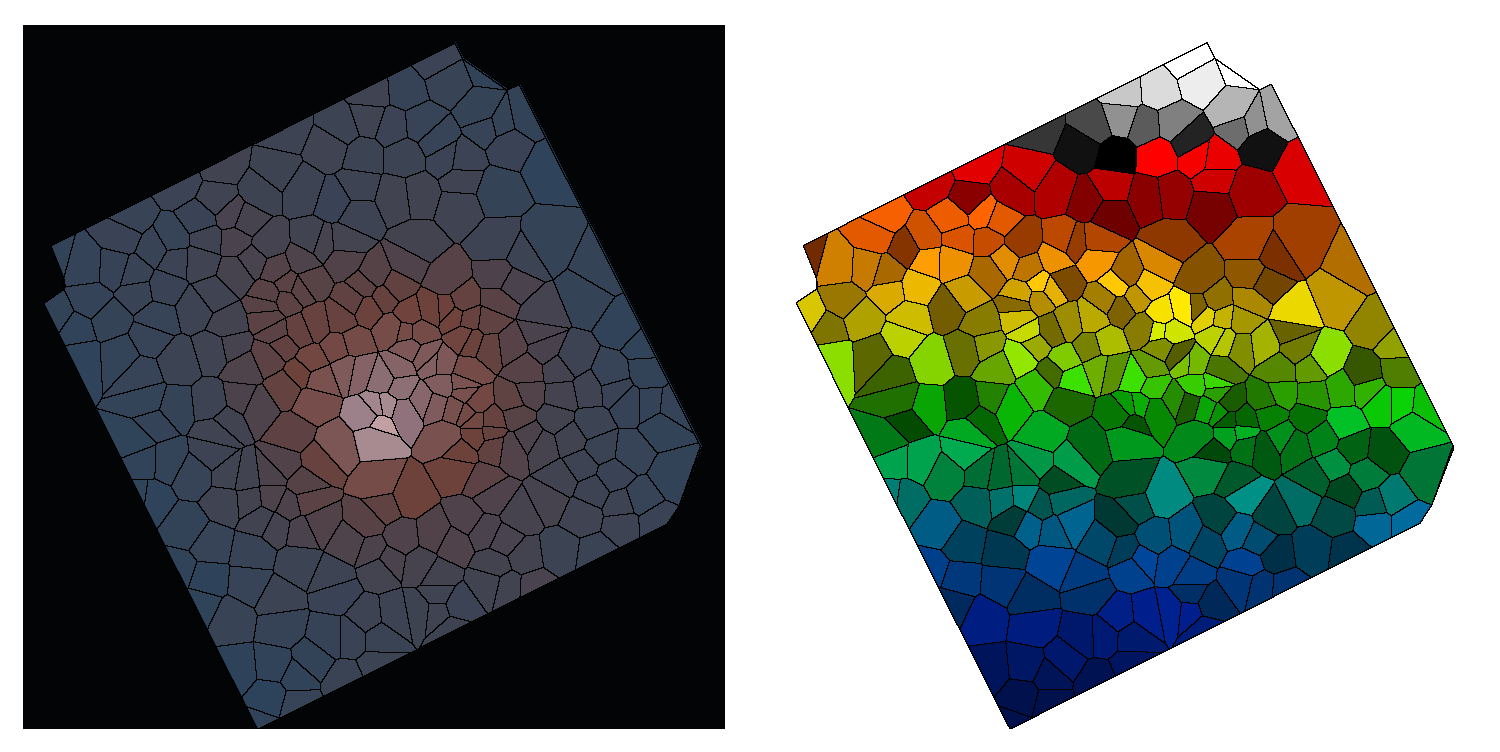

In [15]:
ds9 -geometry 1500x800 vtbin/tess5.img -scale log -block to 2 -scale limits 0 2e-6 \
    -cmap load sunset-in-atlantis.sao \
    -mask color black -mask vtbin/tess5.grad -nomask \
    vtbin/tess5.map -scale linear -scale mode minmax -zoom to 0.5 -block to 1 \
    -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
    -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
    -mask color black -mask vtbin/tess5.grad -nomask \
    -saveimage png tess5.png -exit

display < tess5.png